# GWES - WW3 Ensemble Outputs

In [2]:
import matplotlib.pyplot as plt
from matplotlib import cm
import pygrib
import numpy as np
plt.interactive(True)

Import Basemap with workaround to set the `PROJ_LIB` environment variable

In [4]:
import os
try:
    os.environ['PROJ_LIB'] = '/home/robwall/anaconda2/envs/metocean_data_py3/share/proj'
    from mpl_toolkits.basemap import Basemap
except:
    os.environ['PROJ_LIB'] = '/home/robwall/anaconda3/envs/py27/share/proj'
    from mpl_toolkits.basemap import Basemap


## Load Data

In [5]:
data_dir = "../slogger_forecasting/input/ww3"
grb_files = [os.path.join(data_dir, f) for f in os.listdir(data_dir) if "gwes" in f]

In [7]:
grb_files[:10]

['../slogger_forecasting/input/ww3/20190211_gwes03.glo_30m.t18z.grib2',
 '../slogger_forecasting/input/ww3/20190211_gwes04.glo_30m.t12z.grib2',
 '../slogger_forecasting/input/ww3/20190211_gwes04.glo_30m.t18z.grib2',
 '../slogger_forecasting/input/ww3/20190211_gwes06.glo_30m.t06z.grib2',
 '../slogger_forecasting/input/ww3/20190211_gwes08.glo_30m.t00z.grib2',
 '../slogger_forecasting/input/ww3/20190211_gwes00.glo_30m.t06z.grib2',
 '../slogger_forecasting/input/ww3/20190211_gwes00.glo_30m.t18z.grib2',
 '../slogger_forecasting/input/ww3/20190211_gwes05.glo_30m.t18z.grib2',
 '../slogger_forecasting/input/ww3/20190211_gwes02.glo_30m.t06z.grib2',
 '../slogger_forecasting/input/ww3/20190211_gwes03.glo_30m.t06z.grib2']

In [31]:
def plot_aus_waves(grb_f=None, grbs=None):
    if grbs == None:
        grbs = pygrib.open(grb_f)
    grb = grbs.select(name="Significant height of combined wind waves and swell")[0]
    data = grb.values
    lat, lon = grb.latlons()
    
    fig, ax = plt.subplots(figsize=(10,10))
    
    m=Basemap(projection="mill", lat_ts=10, llcrnrlon=140,
         urcrnrlon=165, llcrnrlat=-36, urcrnrlat=-10,
         resolution='c', ax=ax)
    x, y = m(lon, lat)
    cs = m.pcolormesh(x,y,data,shading='flat',cmap=plt.cm.jet)
    m.drawcoastlines()
    m.fillcontinents()
    m.drawmapboundary()
    m.drawparallels(np.arange(-90.,120.,30.),labels=[1,0,0,0])
    m.drawmeridians(np.arange(-180.,180.,60.),labels=[0,0,0,1])

    #plt.colorbar(cs,orientation='vertical')
    
    ax.scatter(x, y, alpha=0.8, s=1, color='k')
    
    plt.title(grb_f)
    plt.show()

## Explore single file

In [29]:
lat_range = [-31, -25]
lon_range = [152, 157]

In [95]:
def slice_latlon(lat, lon, lat_range, lon_range):
    mask = (lat >= lat_range[0]) & (lat <= lat_range[1]) & \
           (lon >= lon_range[0]) & (lon <= lon_range[1])
    
    dim1 = np.any(mask, axis=1).sum()
    dim2 = np.any(mask, axis=0).sum()
    
    lat_extract = lat[mask].reshape(dim1, dim2)
    lon_extract = lon[mask].reshape(dim1, dim2)
    
    return lat_extract, lon_extract



In [79]:
grb = pygrib.open(grb_files[0])
ww3_grb = pygrib.open("../slogger_forecasting/input/ww3/20190210_nww3.t00z.grib.grib2")
era5_grb = pygrib.open("data/era5_20180601.grib")

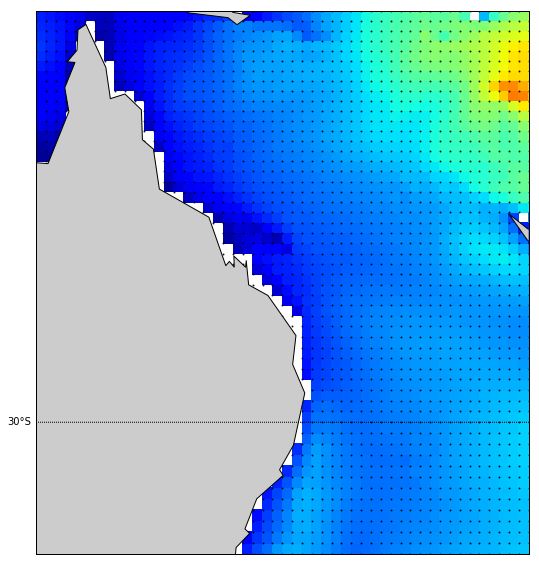

In [32]:
plot_aus_waves(grbs=grb)

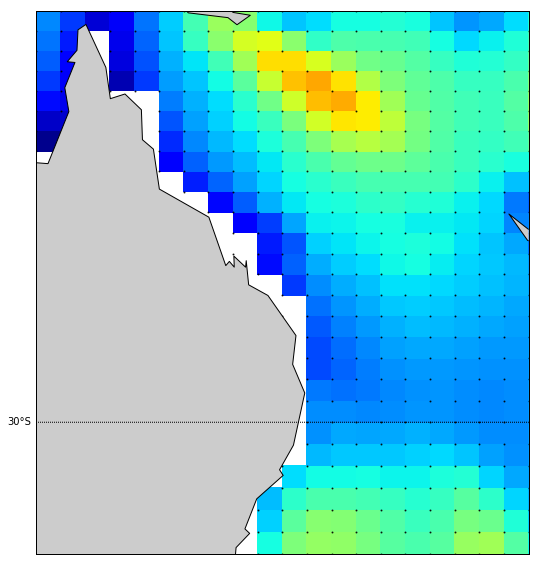

In [50]:
plot_aus_waves(grbs=ww3_grb)

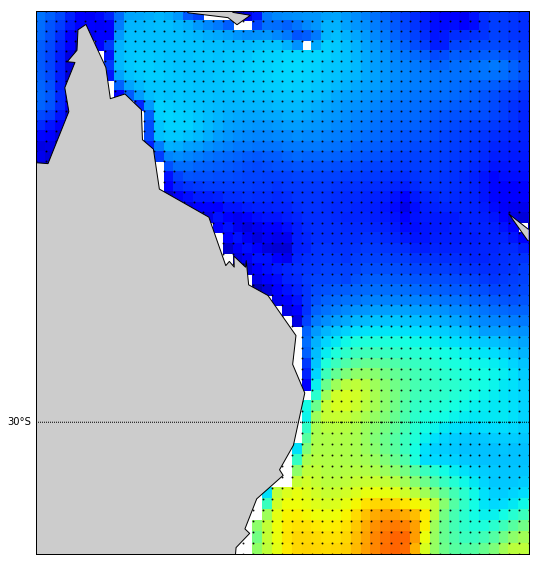

In [80]:
plot_aus_waves(grbs=era5_grb)

In [17]:
l = [g.name for g in grb]

In [81]:
waves = grb.select(name="Significant height of combined wind waves and swell")
ww3 = ww3_grb.select(name="Significant height of combined wind waves and swell")
e5 = era5_grb.select(name="Significant height of combined wind waves and swell")

In [82]:
g = waves[0]
w = ww3[0]
e = e5[0]

In [83]:
gdata = g.values
wdata = w.values
edata = e.values

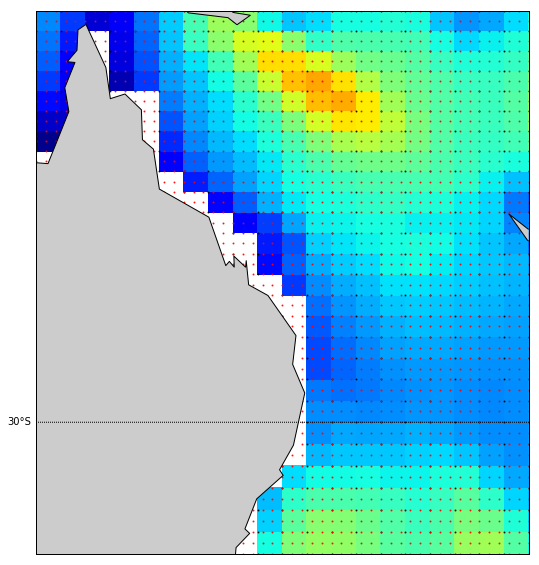

In [76]:
wlat, wlon = w.latlons()
glat, glon = g.latlons()


fig, ax = plt.subplots(figsize=(10,10))

m=Basemap(projection="mill", lat_ts=10, llcrnrlon=140,
     urcrnrlon=165, llcrnrlat=-36, urcrnrlat=-10,
     resolution='c', ax=ax)
xw, yw = m(wlon, wlat)
xg, yg = m(glon, glat)
cs = m.pcolormesh(xw,yw,wdata,shading='flat',cmap=plt.cm.jet)
m.drawcoastlines()
m.fillcontinents()
m.drawmapboundary()
m.drawparallels(np.arange(-90.,120.,30.),labels=[1,0,0,0])
m.drawmeridians(np.arange(-180.,180.,60.),labels=[0,0,0,1])

#plt.colorbar(cs,orientation='vertical')

ax.scatter(xw, yw, alpha=0.8, s=1, color='k')
ax.scatter(xg, yg, alpha=0.8, s=1, color='r')

plt.show()

In [77]:
gdata.data.shape

(101, 161)

In [78]:
wdata.data.shape

(51, 65)

In [86]:
edata.data.shape

(361, 720)

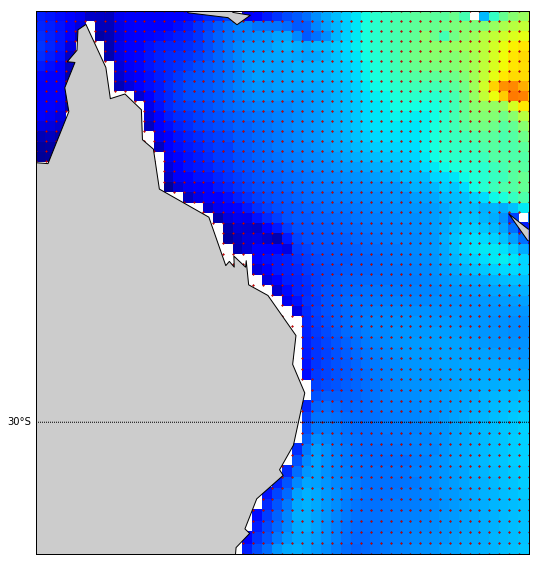

In [87]:
elat, elon = e.latlons()
glat, glon = g.latlons()


fig, ax = plt.subplots(figsize=(10,10))

m=Basemap(projection="mill", lat_ts=10, llcrnrlon=140,
     urcrnrlon=165, llcrnrlat=-36, urcrnrlat=-10,
     resolution='c', ax=ax)
xe, ye = m(elon, elat)
xg, yg = m(glon, glat)
cs = m.pcolormesh(xg,yg,gdata,shading='flat',cmap=plt.cm.jet)
m.drawcoastlines()
m.fillcontinents()
m.drawmapboundary()
m.drawparallels(np.arange(-90.,120.,30.),labels=[1,0,0,0])
m.drawmeridians(np.arange(-180.,180.,60.),labels=[0,0,0,1])

#plt.colorbar(cs,orientation='vertical')

ax.scatter(xg, yg, alpha=0.8, s=1, color='k')
ax.scatter(xe, ye, alpha=0.8, s=1, color='r', marker="x")

plt.show()

## GWES vs ERA5

So GWES has a much higher resolution grid than WW3, see if this is equal to ERA5

In [177]:
elat, elon = e.latlons()
glat, glon = g.latlons()

elat, elon = slice_latlon(elat, elon, lat_range, lon_range)
glat, glon = slice_latlon(glat, glon, lat_range, lon_range)

edata = e.data(lat1=lat_range[0], lat2=lat_range[1],
               lon1=lon_range[0], lon2=lon_range[1])[0]
gdata = g.data(lat1=lat_range[0], lat2=lat_range[1],
               lon1=lon_range[0], lon2=lon_range[1])[0]

In [109]:
edata.shape, gdata.shape

((13, 11), (13, 11))

In [121]:
def plot_extract(data, lat, lon, ww3lat, ww3lon, fig=None, ax=None):
    
    if (ax is None) and (fig is None):
        fig, ax = plt.subplots(figsize=(10,10))
    
    m=Basemap(projection="mill", lat_ts=10, llcrnrlon=140,
         urcrnrlon=165, llcrnrlat=-36, urcrnrlat=-10,
         resolution='c', ax=ax)
    x, y = m(lon, lat)
    cs = m.pcolormesh(x,y,data,shading='flat',cmap=plt.cm.jet)
    m.drawcoastlines()
    #m.fillcontinents()
    m.drawmapboundary()
    m.drawparallels(np.arange(-90.,120.,30.),labels=[1,0,0,0])
    m.drawmeridians(np.arange(-180.,180.,60.),labels=[0,0,0,1])

    # Plot model points
    ax.scatter(x, y, alpha=0.8, s=1, color='k')
        
    # Plot region
    box_lon = [lon_range[0], lon_range[0],
              lon_range[1], lon_range[1],
              lon_range[0]]
    box_lat = [lat_range[0], lat_range[1],
              lat_range[1], lat_range[0],
              lat_range[0]]
    x_box, y_box = m(box_lon, box_lat)
    ax.plot(x_box, y_box, color="green")
    
    xww3, yww3 = m(ww3lon, ww3lat)
    ax.scatter(xww3, yww3, s=30, color = "purple", marker="x", alpha=0.5)
        
    return fig, ax
    

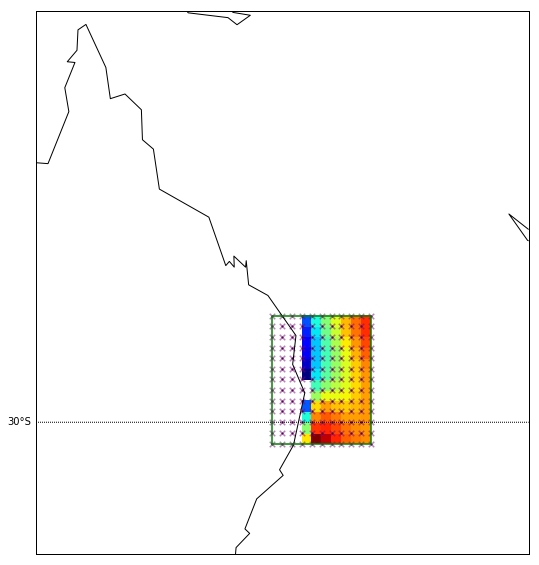

In [178]:
fig, ax = plot_extract(gdata, glat, glon, elat, elon)

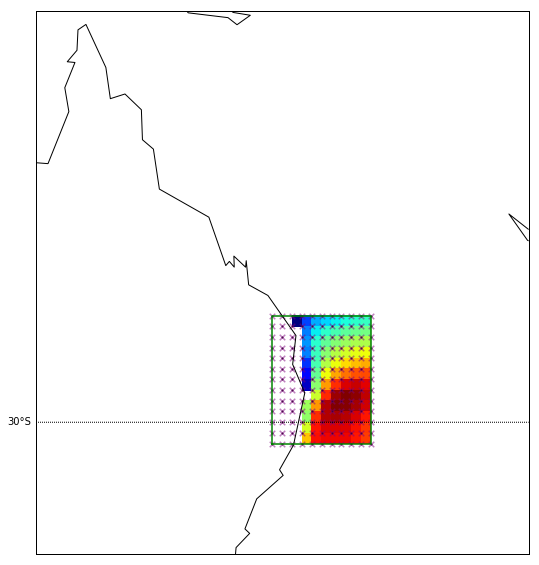

In [244]:
fig, ax = plot_extract(edata, elat, elon, glat, glon)

In [139]:
elat == glat

array([[False, False, False, False, False, False, False, False, False,
        False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True],
       [False, False, False, False, False, False, False, False, False,
        False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False],
       [False, False, False, False, False, False, False, Fal

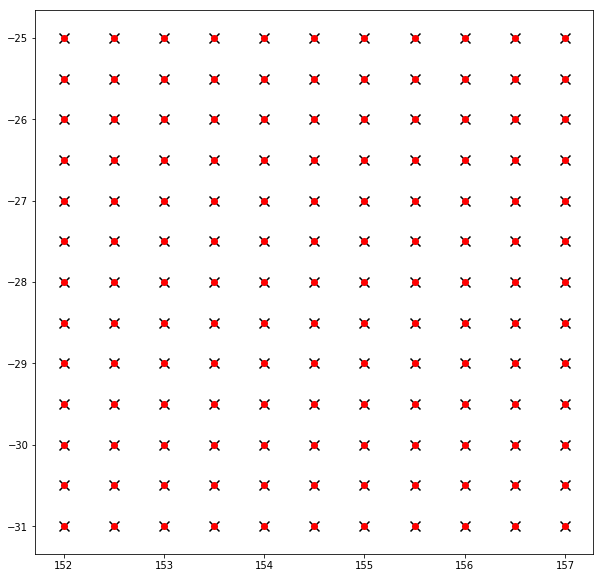

In [133]:
fig, ax = plt.subplots(figsize=(10,10))

ax.scatter(elon, elat, marker="x", color="k", s=100)
ax.scatter(glon, glat, marker="o", color="r")

plt.show()

In [179]:
def plot_extract_mask(data, lat, lon, ww3lat, ww3lon, 
                      mask, ww3mask, fig=None, ax=None):
    
    if (ax is None) and (fig is None):
        fig, ax = plt.subplots(figsize=(10,10))
    
    m=Basemap(projection="mill", lat_ts=10, llcrnrlon=140,
         urcrnrlon=165, llcrnrlat=-36, urcrnrlat=-10,
         resolution='c', ax=ax)
    x, y = m(lon, lat)
    cs = m.pcolormesh(x,y,data,shading='flat',cmap=plt.cm.jet)
    m.drawcoastlines()
    #m.fillcontinents()
    m.drawmapboundary()
    m.drawparallels(np.arange(-90.,120.,30.),labels=[1,0,0,0])
    m.drawmeridians(np.arange(-180.,180.,60.),labels=[0,0,0,1])

    # Plot model points
    ax.scatter(x[~mask], y[~mask], alpha=0.8, s=1, color='k')
        
    # Plot region
    box_lon = [lon_range[0], lon_range[0],
              lon_range[1], lon_range[1],
              lon_range[0]]
    box_lat = [lat_range[0], lat_range[1],
              lat_range[1], lat_range[0],
              lat_range[0]]
    x_box, y_box = m(box_lon, box_lat)
    ax.plot(x_box, y_box, color="green")
    
    xww3, yww3 = m(ww3lon, ww3lat)
    ax.scatter(xww3[~ww3mask], yww3[~ww3mask], s=30, color = "purple", marker="x", alpha=0.5)
        
    return fig, ax
    

In [153]:
np.all(glon == elon)

True

In [154]:
np.all(glat == elat)

False

In [160]:
np.all(glat == np.flipud(elat))

True

In [170]:
elon[edata.mask]

array([152. , 152.5, 152. , 152.5, 153. , 152. , 152.5, 153. , 152. ,
       152.5, 153. , 152. , 152.5, 153. , 152. , 152.5, 153. , 152. ,
       152.5, 153. , 152. , 152.5, 153. , 153.5, 152. , 152.5, 153. ,
       152. , 152.5, 153. , 152. , 152.5, 153. , 152. , 152.5, 153. ,
       152. , 152.5])

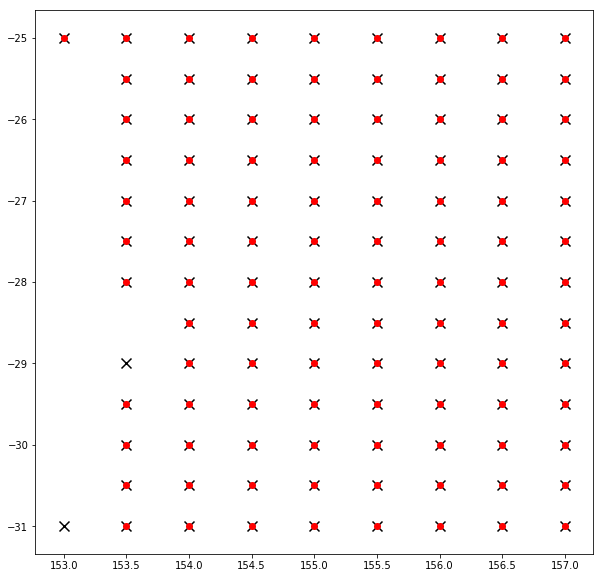

In [173]:
fig, ax = plt.subplots(figsize=(10,10))

ax.scatter(elon[~edata.mask], elat[~edata.mask], marker="x", color="k", s=100)
ax.scatter(glon[~gdata.mask], glat[~gdata.mask], marker="o", color="r")

plt.show()

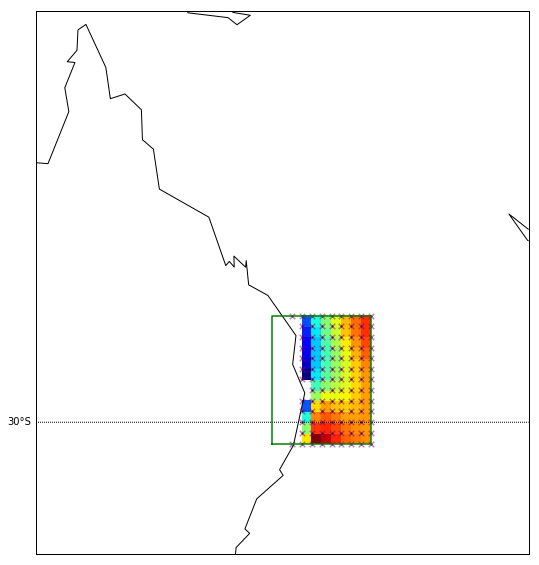

In [180]:
fig, ax = plot_extract_mask(gdata, glat, glon, elat, elon, gdata.mask, edata.mask)

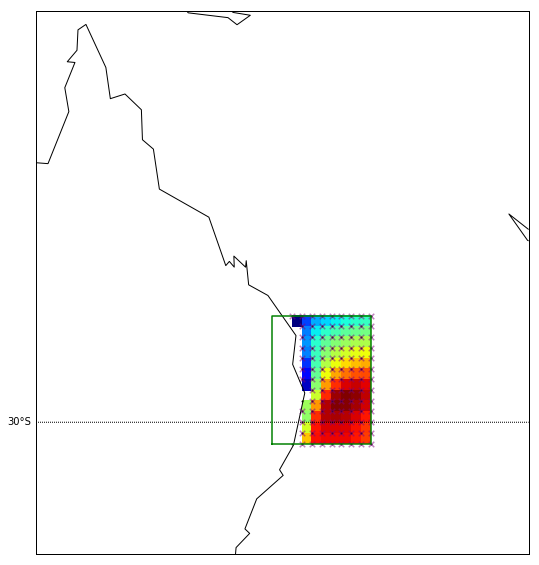

In [181]:
fig, ax = plot_extract_mask(edata, elat, elon, glat, glon, edata.mask, gdata.mask)

The grid locations for era5 and gwes are the same, though the latitudes are a mirror of eachother and the era5 mask has a few extra non-masked points. So to format the era5 for training data so that the gwes can be used to forecast with - flip the latitudes and the data "up-down" (np.flipud()) and use the mask from the gwes

In [188]:
np.flipud(edata.data)[~gdata.mask].shape

(103,)

In [185]:
gdata.data[~gdata.mask].shape

(103,)

In [192]:
np.all(glon[~gdata.mask] == elon[~gdata.mask])

True

In [193]:
np.all(glat[~gdata.mask] == np.flipud(elat.data)[~gdata.mask])

True

In [211]:
def _var_col_names_latlons(var_name, in_lat, in_lon):
    cnames = []
    for lat, lon in zip(in_lat, in_lon):
        latstr = "n" if lat < 0 else "p"
        lonstr = "n" if lon < 0 else "p"
        cstr = "{}_lat_{}{}_lon_{}{}".format(var_name, latstr, lat, lonstr, lon)
        cstr = cstr.replace("-", "")
        cstr = cstr.replace(".", "_")
        cnames.append(cstr)
    return cnames

In [212]:
gcolnames = _var_col_names_latlons("hs", glat[~gdata.mask], glon[~gdata.mask])
gcolnames[:10]

['hs_lat_n31_0_lon_p153_5',
 'hs_lat_n31_0_lon_p154_0',
 'hs_lat_n31_0_lon_p154_5',
 'hs_lat_n31_0_lon_p155_0',
 'hs_lat_n31_0_lon_p155_5',
 'hs_lat_n31_0_lon_p156_0',
 'hs_lat_n31_0_lon_p156_5',
 'hs_lat_n31_0_lon_p157_0',
 'hs_lat_n30_5_lon_p153_5',
 'hs_lat_n30_5_lon_p154_0']

In [205]:
ecolnames = _var_col_names_latlons("hs", np.flipud(elat)[~gdata.mask], elon[~gdata.mask])
ecolnames[:10]

['hs_lat31_0_lon153_5',
 'hs_lat31_0_lon154_0',
 'hs_lat31_0_lon154_5',
 'hs_lat31_0_lon155_0',
 'hs_lat31_0_lon155_5',
 'hs_lat31_0_lon156_0',
 'hs_lat31_0_lon156_5',
 'hs_lat31_0_lon157_0',
 'hs_lat30_5_lon153_5',
 'hs_lat30_5_lon154_0']

In [206]:
gcolnames == ecolnames

True

In [224]:
grb.seek(0)

In [227]:
grb.read(1)[0].latlons()

(array([[-50. , -50. , -50. , ..., -50. , -50. , -50. ],
        [-49.5, -49.5, -49.5, ..., -49.5, -49.5, -49.5],
        [-49. , -49. , -49. , ..., -49. , -49. , -49. ],
        ...,
        [ -1. ,  -1. ,  -1. , ...,  -1. ,  -1. ,  -1. ],
        [ -0.5,  -0.5,  -0.5, ...,  -0.5,  -0.5,  -0.5],
        [  0. ,   0. ,   0. , ...,   0. ,   0. ,   0. ]]),
 array([[100. , 100.5, 101. , ..., 179. , 179.5, 180. ],
        [100. , 100.5, 101. , ..., 179. , 179.5, 180. ],
        [100. , 100.5, 101. , ..., 179. , 179.5, 180. ],
        ...,
        [100. , 100.5, 101. , ..., 179. , 179.5, 180. ],
        [100. , 100.5, 101. , ..., 179. , 179.5, 180. ],
        [100. , 100.5, 101. , ..., 179. , 179.5, 180. ]]))

In [235]:
wind = grb.select(name="U component of wind")
wind_ww3 = ww3_grb.select(name="U component of wind")
wind_e5 = era5_grb.select(name="10 metre U wind component")

In [236]:
gw = wind[0]
ww = wind_ww3[0]
ew = wind_e5[0]

In [237]:
ewlat, ewlon = ew.latlons()
gwlat, gwlon = gw.latlons()

ewlat, ewlon = slice_latlon(ewlat, ewlon, lat_range, lon_range)
gwlat, gwlon = slice_latlon(gwlat, gwlon, lat_range, lon_range)

ewdata = ew.data(lat1=lat_range[0], lat2=lat_range[1],
               lon1=lon_range[0], lon2=lon_range[1])[0]
gwdata = gw.data(lat1=lat_range[0], lat2=lat_range[1],
               lon1=lon_range[0], lon2=lon_range[1])[0]

In [248]:
ewlat.shape

(25, 21)

In [239]:
gwlat.shape

(13, 11)

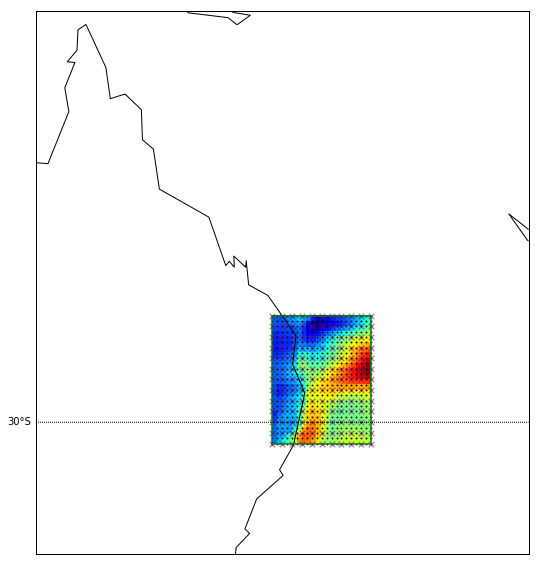

In [249]:
fig, ax = plot_extract(ewdata, ewlat, ewlon, gwlat, gwlon)

In [259]:
type(ewdata)

numpy.ndarray

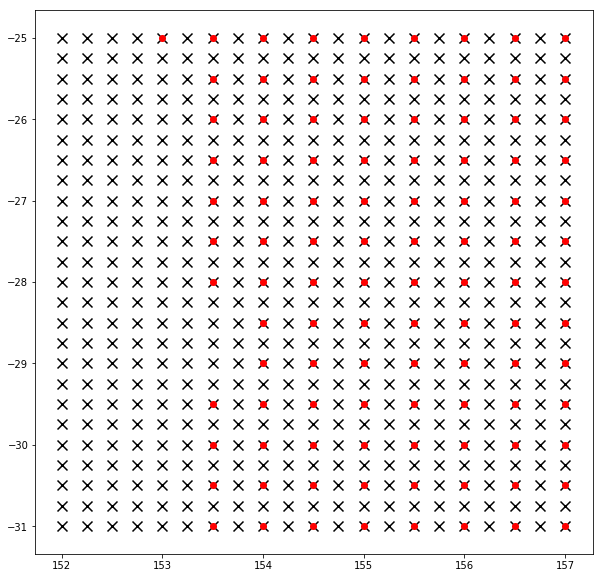

In [257]:
fig, ax = plt.subplots(figsize=(10,10))

ax.scatter(ewlon, ewlat, marker="x", color="k", s=100)
ax.scatter(gwlon[~gwdata.mask], gwlat[~gwdata.mask], marker="o", color="r")

plt.show()

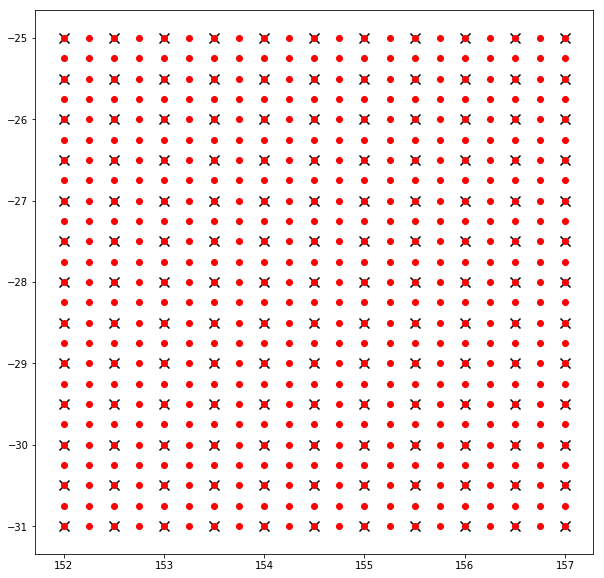

In [253]:
fig, ax = plt.subplots(figsize=(10,10))

ax.scatter(gwlon, gwlat, marker="x", color="k", s=100)
ax.scatter(ewlon, ewlat, marker="o", color="r")

plt.show()

In [274]:
grb.seek(0)
vnames = [(g.name, g.shortName) for g in grb]

In [275]:
set(vnames)

{('Direction of wind waves', 'wvdir'),
 ('Mean period of wind waves', 'mpww'),
 ('Mean wave period', 'mwp'),
 ('Primary wave direction', 'dirpw'),
 ('Primary wave mean period', 'perpw'),
 ('Sea ice area fraction', 'ci'),
 ('Significant height of combined wind waves and swell', 'swh'),
 ('Significant height of wind waves', 'shww'),
 ('U component of wind', 'u'),
 ('V component of wind', 'v'),
 ('Wind direction', 'wdir'),
 ('Wind speed', 'ws')}

In [276]:
era5_grb.seek(0)
vnames = [(g.name, g.shortName) for g in era5_grb]

In [277]:
set(vnames)

{('10 metre U wind component', '10u'),
 ('10 metre V wind component', '10v'),
 ('Mean direction of total swell', 'mdts'),
 ('Mean direction of wind waves', 'mdww'),
 ('Mean period of total swell', 'mpts'),
 ('Mean period of wind waves', 'mpww'),
 ('Mean wave direction', 'mwd'),
 ('Mean wave direction of first swell partition', 'mwd1'),
 ('Mean wave direction of second swell partition', 'mwd2'),
 ('Mean wave period', 'mwp'),
 ('Mean wave period based on first moment for swell', 'p1ps'),
 ('Mean wave period of first swell partition', 'mwp1'),
 ('Mean wave period of second swell partition', 'mwp2'),
 ('Significant height of combined wind waves and swell', 'swh'),
 ('Significant height of wind waves', 'shww')}

In [304]:
ww3_grb.seek(0)
vnames = [(g.name, g.shortName) for g in ww3_grb]

In [305]:
set(vnames)

{('Direction of wind waves', 'wvdir'),
 ('Mean period of wind waves', 'mpww'),
 ('Primary wave direction', 'dirpw'),
 ('Primary wave mean period', 'perpw'),
 ('Secondary wave direction', 'dirsw'),
 ('Secondary wave mean period', 'persw'),
 ('Significant height of combined wind waves and swell', 'swh'),
 ('Significant height of wind waves', 'shww'),
 ('U component of wind', 'u'),
 ('V component of wind', 'v'),
 ('Wind direction', 'wdir'),
 ('Wind speed', 'ws')}